In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing as p 
import numpy as np
import seaborn as sns
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM,Dense
#import statsmodels.api as sm
#from Preprocessing import MinMaxScaler

import math
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [43]:
df = pd.read_csv("AAPL.csv")

In [45]:
df1 = np.array(df1)
df1 = df1.reshape(-1,1)

In [44]:
df1  =df.reset_index()['close']

In [20]:
#sm.qqplot(df_reconstructed.resid)
#plt.show()

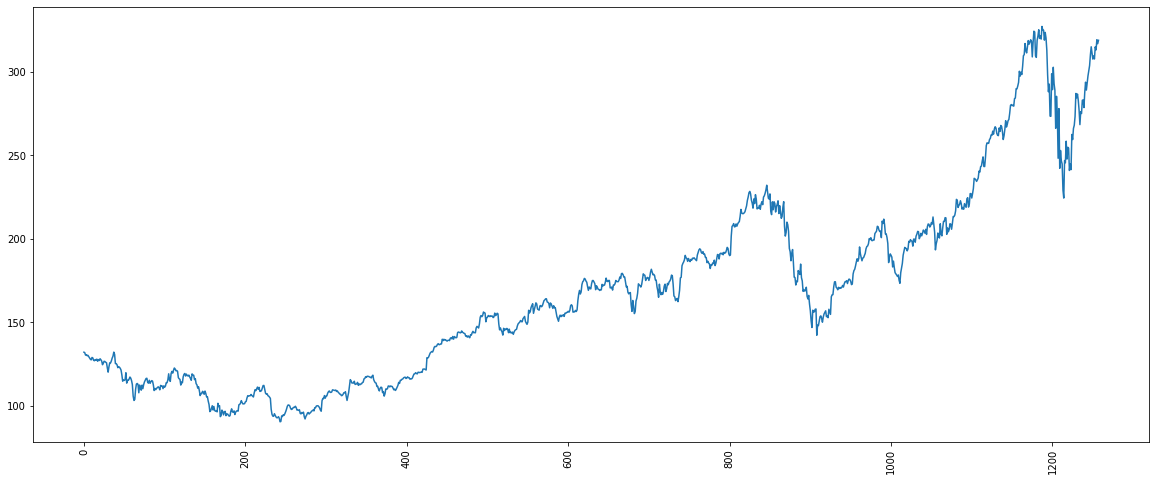

In [46]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90) 
plt.plot(df1)


In [47]:
scaler = p.MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(df1)



In [48]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [49]:
train_size = int(len(df1)*0.65)
test_size = len(df1)- (train_size)
train_df, test_df = df1[0:train_size,:] , df1[train_size:len(df1),:]

In [43]:
type(train_df)

numpy.ndarray

In [39]:
test_df.shape

(315, 1)

In [40]:
train_size,test_size

(943, 315)

In [50]:
def create_dataset(dataset,time_step=1):
    dataX, dataY =[],[]
    for i in range(len(dataset)-  time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step,0])
    return np.array(dataX),np.array(dataY)

In [51]:
time_Step=100
x_train, y_train = create_dataset(train_df,time_Step)
x_test, y_test = create_dataset(test_df,time_Step) 

In [44]:
print(x_test.shape)

(214, 100)


In [52]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)


In [53]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=100, batch_size=64, verbose=1)

Train on 716 samples, validate on 340 samples
Epoch 1/100
716/716 [==============================] - 6s 8ms/step - loss: 0.0147 - val_loss: 0.0617
Epoch 2/100
716/716 [==============================] - 4s 5ms/step - loss: 0.0032 - val_loss: 0.0046
Epoch 3/100
716/716 [==============================] - 4s 5ms/step - loss: 0.0011 - val_loss: 0.0063
Epoch 4/100
716/716 [==============================] - 4s 5ms/step - loss: 8.2115e-04 - val_loss: 0.0041
Epoch 5/100
716/716 [==============================] - 4s 5ms/step - loss: 7.4366e-04 - val_loss: 0.0044
Epoch 6/100
716/716 [==============================] - 4s 5ms/step - loss: 7.0903e-04 - val_loss: 0.0048
Epoch 7/100
716/716 [==============================] - 4s 5ms/step - loss: 6.5854e-04 - val_loss: 0.0043
Epoch 8/100
716/716 [==============================] - 4s 6ms/step - loss: 6.4680e-04 - val_loss: 0.0043
Epoch 9/100
716/716 [==============================] - 4s 6ms/step - loss: 6.1512e-04 - val_loss: 0.0045
Epoch 10/100
716/716 

716/716 [==============================] - 4s 5ms/step - loss: 1.8713e-04 - val_loss: 0.0013
Epoch 79/100
716/716 [==============================] - 4s 5ms/step - loss: 1.8591e-04 - val_loss: 0.0012
Epoch 80/100
716/716 [==============================] - 4s 5ms/step - loss: 2.1656e-04 - val_loss: 0.0013
Epoch 81/100
716/716 [==============================] - 4s 5ms/step - loss: 1.8202e-04 - val_loss: 0.0014
Epoch 82/100
716/716 [==============================] - 4s 5ms/step - loss: 1.8217e-04 - val_loss: 0.0013
Epoch 83/100
716/716 [==============================] - 4s 5ms/step - loss: 1.7228e-04 - val_loss: 0.0011
Epoch 84/100
716/716 [==============================] - 5s 6ms/step - loss: 1.7743e-04 - val_loss: 0.0019
Epoch 85/100
716/716 [==============================] - 4s 5ms/step - loss: 2.4537e-04 - val_loss: 0.0018
Epoch 86/100
716/716 [==============================] - 4s 5ms/step - loss: 2.2408e-04 - val_loss: 0.0012
Epoch 87/100
716/716 [==============================] - 4s 

In [56]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)


In [57]:
train_pred= scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)


In [58]:
math.sqrt(mean_squared_error(y_train,train_pred))

141.94770395738567

In [59]:
math.sqrt(mean_squared_error(y_test,test_pred))

239.22626420207456

### PLOT

In [60]:
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_pred)+ look_back ,:] = train_pred
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_pred)+(look_back*2)+1: len(df1)-1, :] = test_pred

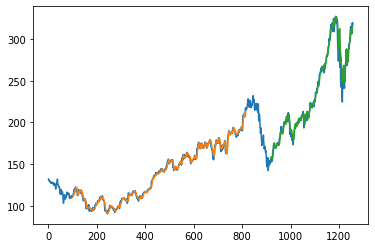

In [61]:
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

In [62]:
len(test_df)

441

In [63]:
x_input  =  test_df[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [64]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [65]:
type(temp_input)

list

In [42]:
x_input.shape

(1, 100, 1)

In [72]:
lst_output=[]
n_steps=100
i=0
while(i<100):
    if(len(temp_input) >100):
        #print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input{}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input= x_input.reshape(1,n_steps,1)
        yhat = model.predict(x_input,verbose=0)
        print("{} day input{}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input= x_input.reshape(1,n_steps,1)
        yhat = model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
        
print(lst_output)       
        

0 day input[0.99016297 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007
 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017
 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113
 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013
 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193
 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292
 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832 0.83049059
 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543 0.78426074
 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843
 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211
 0.948535   0.93333615 0.91746179 0.92544119 0.91771511 0.9483239
 0.94064004 0.96635143 0.9563033  0.96491598 0.96673697 0.96860647
 0.96899229 0.96897131 0.96917886 0.97005194 0.97186315 0.97470456
 0.97849512 0.98301202 0.98794901 0.99297798 0.9978081  1.00222862
 1.00613654 1.0095371  1.01252925 1.01527476 1.01796

12 day input[[1.1049186]]
13 day input[0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211 0.948535
 0.93333615 0.91746179 0.92544119 0.91771511 0.9483239  0.94064004
 0.96635143 0.9563033  0.96491598 0.96673697 0.96860647 0.96899229
 0.96897131 0.96917886 0.97005194 0.97186315 0.97470456 0.97849512
 0.98301202 0.98794901 0.99297798 0.9978081  1.00222862 1.00613654
 1.0095371  1.01252925 1.01527476 1.0179621  1.02076709 1.023826
 1.02721465 1.03094244 1.03495932 1.03917241 1.04346728 1.04772913
 1.05186546 1.05581582 1.05956

24 day input[[1.1422946]]
25 day input[0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211 0.948535
 0.93333615 0.91746179 0.92544119 0.91771511 0.9483239  0.94064004
 0.96635143 0.9563033  0.96491598 0.96673697 0.96860647 0.96899229
 0.96897131 0.96917886 0.97005194 0.97186315 0.97470456 0.97849512
 0.98301202 0.98794901 0.99297798 0.9978081  1.00222862 1.00613654
 1.0095371  1.01252925 1.01527476 1.0179621  1.02076709 1.023826
 1.02721465 1.03094244 1.03495932 1.03917241 1.04346728 1.04772913
 1.05186546 1.05581582 1.05956018 1.06311464 1.0665251  1.06985331
 1.07316363 1.07651043 1.07992983 1.08343506 1.08701718 1.09064877
 1.09429216 1.09790647 1.10145

35 day input[[1.1722826]]
36 day input[0.7267162  0.71388162 0.74191506 0.75002111 0.77222832 0.83049059
 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543 0.78426074
 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843
 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211
 0.948535   0.93333615 0.91746179 0.92544119 0.91771511 0.9483239
 0.94064004 0.96635143 0.9563033  0.96491598 0.96673697 0.96860647
 0.96899229 0.96897131 0.96917886 0.97005194 0.97186315 0.97470456
 0.97849512 0.98301202 0.98794901 0.99297798 0.9978081  1.00222862
 1.00613654 1.0095371  1.01252925 1.01527476 1.0179621  1.02076709
 1.023826   1.02721465 1.03094244 1.03495932 1.03917241 1.04346728
 1.04772913 1.05186546 1.05581582 1.05956018 1.06311464 1.0665251
 1.06985331 1.07316363 1.07651043 1.07992983 1.08343506 1.08701718
 1.09064877 1.09429216 1.09790647 1.10145736 1.1049186  1.10828054
 1.11154509 1.11472702 1.11784732 1.12092972 1.12399352 1.12705481
 1.13011968 1.13318563 1.1

46 day input[[1.1981735]]
47 day input[0.78426074 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148
 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415
 0.92793211 0.948535   0.93333615 0.91746179 0.92544119 0.91771511
 0.9483239  0.94064004 0.96635143 0.9563033  0.96491598 0.96673697
 0.96860647 0.96899229 0.96897131 0.96917886 0.97005194 0.97186315
 0.97470456 0.97849512 0.98301202 0.98794901 0.99297798 0.9978081
 1.00222862 1.00613654 1.0095371  1.01252925 1.01527476 1.0179621
 1.02076709 1.023826   1.02721465 1.03094244 1.03495932 1.03917241
 1.04346728 1.04772913 1.05186546 1.05581582 1.05956018 1.06311464
 1.0665251  1.06985331 1.07316363 1.07651043 1.07992983 1.08343506
 1.08701718 1.09064877 1.09429216 1.09790647 1.10145736 1.1049186
 1.10828054 1.11154509 1.11472702 1.11784732 1.12092972 1.12399352
 1.12705481 1.13011968 1.13318563 1.13624573 1.13928628 1.14229465
 1.145257   1.14816594 1.15101671 1.15380979 1.15655065 1.15924573
 1.16190469 1.16453326 1.16

58 day input[[1.2218778]]
59 day input[0.92793211 0.948535   0.93333615 0.91746179 0.92544119 0.91771511
 0.9483239  0.94064004 0.96635143 0.9563033  0.96491598 0.96673697
 0.96860647 0.96899229 0.96897131 0.96917886 0.97005194 0.97186315
 0.97470456 0.97849512 0.98301202 0.98794901 0.99297798 0.9978081
 1.00222862 1.00613654 1.0095371  1.01252925 1.01527476 1.0179621
 1.02076709 1.023826   1.02721465 1.03094244 1.03495932 1.03917241
 1.04346728 1.04772913 1.05186546 1.05581582 1.05956018 1.06311464
 1.0665251  1.06985331 1.07316363 1.07651043 1.07992983 1.08343506
 1.08701718 1.09064877 1.09429216 1.09790647 1.10145736 1.1049186
 1.10828054 1.11154509 1.11472702 1.11784732 1.12092972 1.12399352
 1.12705481 1.13011968 1.13318563 1.13624573 1.13928628 1.14229465
 1.145257   1.14816594 1.15101671 1.15380979 1.15655065 1.15924573
 1.16190469 1.16453326 1.16713798 1.16972148 1.17228258 1.17481911
 1.1773262  1.17979968 1.18223524 1.18462992 1.18698263 1.18929386
 1.19156551 1.19380057 1.19

70 day input[[1.2412791]]
71 day input[0.96860647 0.96899229 0.96897131 0.96917886 0.97005194 0.97186315
 0.97470456 0.97849512 0.98301202 0.98794901 0.99297798 0.9978081
 1.00222862 1.00613654 1.0095371  1.01252925 1.01527476 1.0179621
 1.02076709 1.023826   1.02721465 1.03094244 1.03495932 1.03917241
 1.04346728 1.04772913 1.05186546 1.05581582 1.05956018 1.06311464
 1.0665251  1.06985331 1.07316363 1.07651043 1.07992983 1.08343506
 1.08701718 1.09064877 1.09429216 1.09790647 1.10145736 1.1049186
 1.10828054 1.11154509 1.11472702 1.11784732 1.12092972 1.12399352
 1.12705481 1.13011968 1.13318563 1.13624573 1.13928628 1.14229465
 1.145257   1.14816594 1.15101671 1.15380979 1.15655065 1.15924573
 1.16190469 1.16453326 1.16713798 1.16972148 1.17228258 1.17481911
 1.1773262  1.17979968 1.18223524 1.18462992 1.18698263 1.18929386
 1.19156551 1.19380057 1.19600248 1.19817352 1.20031631 1.2024312
 1.20451772 1.20657587 1.20860338 1.21059918 1.21256208 1.21449089
 1.21638668 1.21824849 1.220

83 day input[[1.2580789]]
84 day input[1.00613654 1.0095371  1.01252925 1.01527476 1.0179621  1.02076709
 1.023826   1.02721465 1.03094244 1.03495932 1.03917241 1.04346728
 1.04772913 1.05186546 1.05581582 1.05956018 1.06311464 1.0665251
 1.06985331 1.07316363 1.07651043 1.07992983 1.08343506 1.08701718
 1.09064877 1.09429216 1.09790647 1.10145736 1.1049186  1.10828054
 1.11154509 1.11472702 1.11784732 1.12092972 1.12399352 1.12705481
 1.13011968 1.13318563 1.13624573 1.13928628 1.14229465 1.145257
 1.14816594 1.15101671 1.15380979 1.15655065 1.15924573 1.16190469
 1.16453326 1.16713798 1.16972148 1.17228258 1.17481911 1.1773262
 1.17979968 1.18223524 1.18462992 1.18698263 1.18929386 1.19156551
 1.19380057 1.19600248 1.19817352 1.20031631 1.2024312  1.20451772
 1.20657587 1.20860338 1.21059918 1.21256208 1.21449089 1.21638668
 1.21824849 1.22007895 1.22187781 1.22364712 1.22538781 1.22710061
 1.22878611 1.23044455 1.23207557 1.23367929 1.23525465 1.23680246
 1.23832214 1.23981416 1.241

96 day input[[1.2711942]]
97 day input[1.05186546 1.05581582 1.05956018 1.06311464 1.0665251  1.06985331
 1.07316363 1.07651043 1.07992983 1.08343506 1.08701718 1.09064877
 1.09429216 1.09790647 1.10145736 1.1049186  1.10828054 1.11154509
 1.11472702 1.11784732 1.12092972 1.12399352 1.12705481 1.13011968
 1.13318563 1.13624573 1.13928628 1.14229465 1.145257   1.14816594
 1.15101671 1.15380979 1.15655065 1.15924573 1.16190469 1.16453326
 1.16713798 1.16972148 1.17228258 1.17481911 1.1773262  1.17979968
 1.18223524 1.18462992 1.18698263 1.18929386 1.19156551 1.19380057
 1.19600248 1.19817352 1.20031631 1.2024312  1.20451772 1.20657587
 1.20860338 1.21059918 1.21256208 1.21449089 1.21638668 1.21824849
 1.22007895 1.22187781 1.22364712 1.22538781 1.22710061 1.22878611
 1.23044455 1.23207557 1.23367929 1.23525465 1.23680246 1.23832214
 1.23981416 1.24127913 1.24271727 1.24412978 1.24551678 1.2468791
 1.24821711 1.24953151 1.25082242 1.25208986 1.25333345 1.25455391
 1.25575185 1.2569263  1.

In [79]:
day_new = np.arange(1,101) 
day_pred = np.arange(101,201)

In [80]:
df3 = df1.tolist()
df3.extend(lst_output)

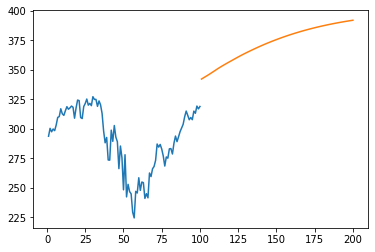

In [82]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [36]:
day_new

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])